In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

# importing the DataSet

In [2]:
DF = pd.read_csv("cancer_reg.csv", encoding='latin')
DF.drop(columns="binnedInc", inplace=True)
# DF.replace([np.inf, -np.inf], np.nan)

# Exploring the data

In [3]:
DF.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0      260131            11.2   499.748204       39.3           36.9  ...   
1       43269            18.6    23.111234       33.0           32.2  ...   
2       21026            14.6    47.560164       45.0           44.0  ...   
3       75882            17.1   342.637253       42.8           42.2  ...   
4       10321            12.5     0.000000       48.3           47.8  ...   

   PctPrivateCoverageAlone PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN               41.6               32.9   
1                     53.8               43.6               31.1   
2                     43.5               34.9               42.1   
3                     40.3               35.0               45.3   
4                     43.9               35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 33 columns]

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

We notice that there are some rows that having null values

# Choosing the predictor

In [5]:
DF.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0      260131            11.2   499.748204       39.3           36.9  ...   
1       43269            18.6    23.111234       33.0           32.2  ...   
2       21026            14.6    47.560164       45.0           44.0  ...   
3       75882            17.1   342.637253       42.8           42.2  ...   
4       10321            12.5     0.000000       48.3           47.8  ...   

   PctPrivateCoverageAlone PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN               41.6               32.9   
1                     53.8               43.6               31.1   
2                     43.5               34.9               42.1   
3                     40.3               35.0               45.3   
4                     43.9               35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 33 columns]

# Part1 : Data Analysis 

* Explore the columns that have null values 
* fill the null values with zeros
* plot the average target death rate per year for each city for the 16 years

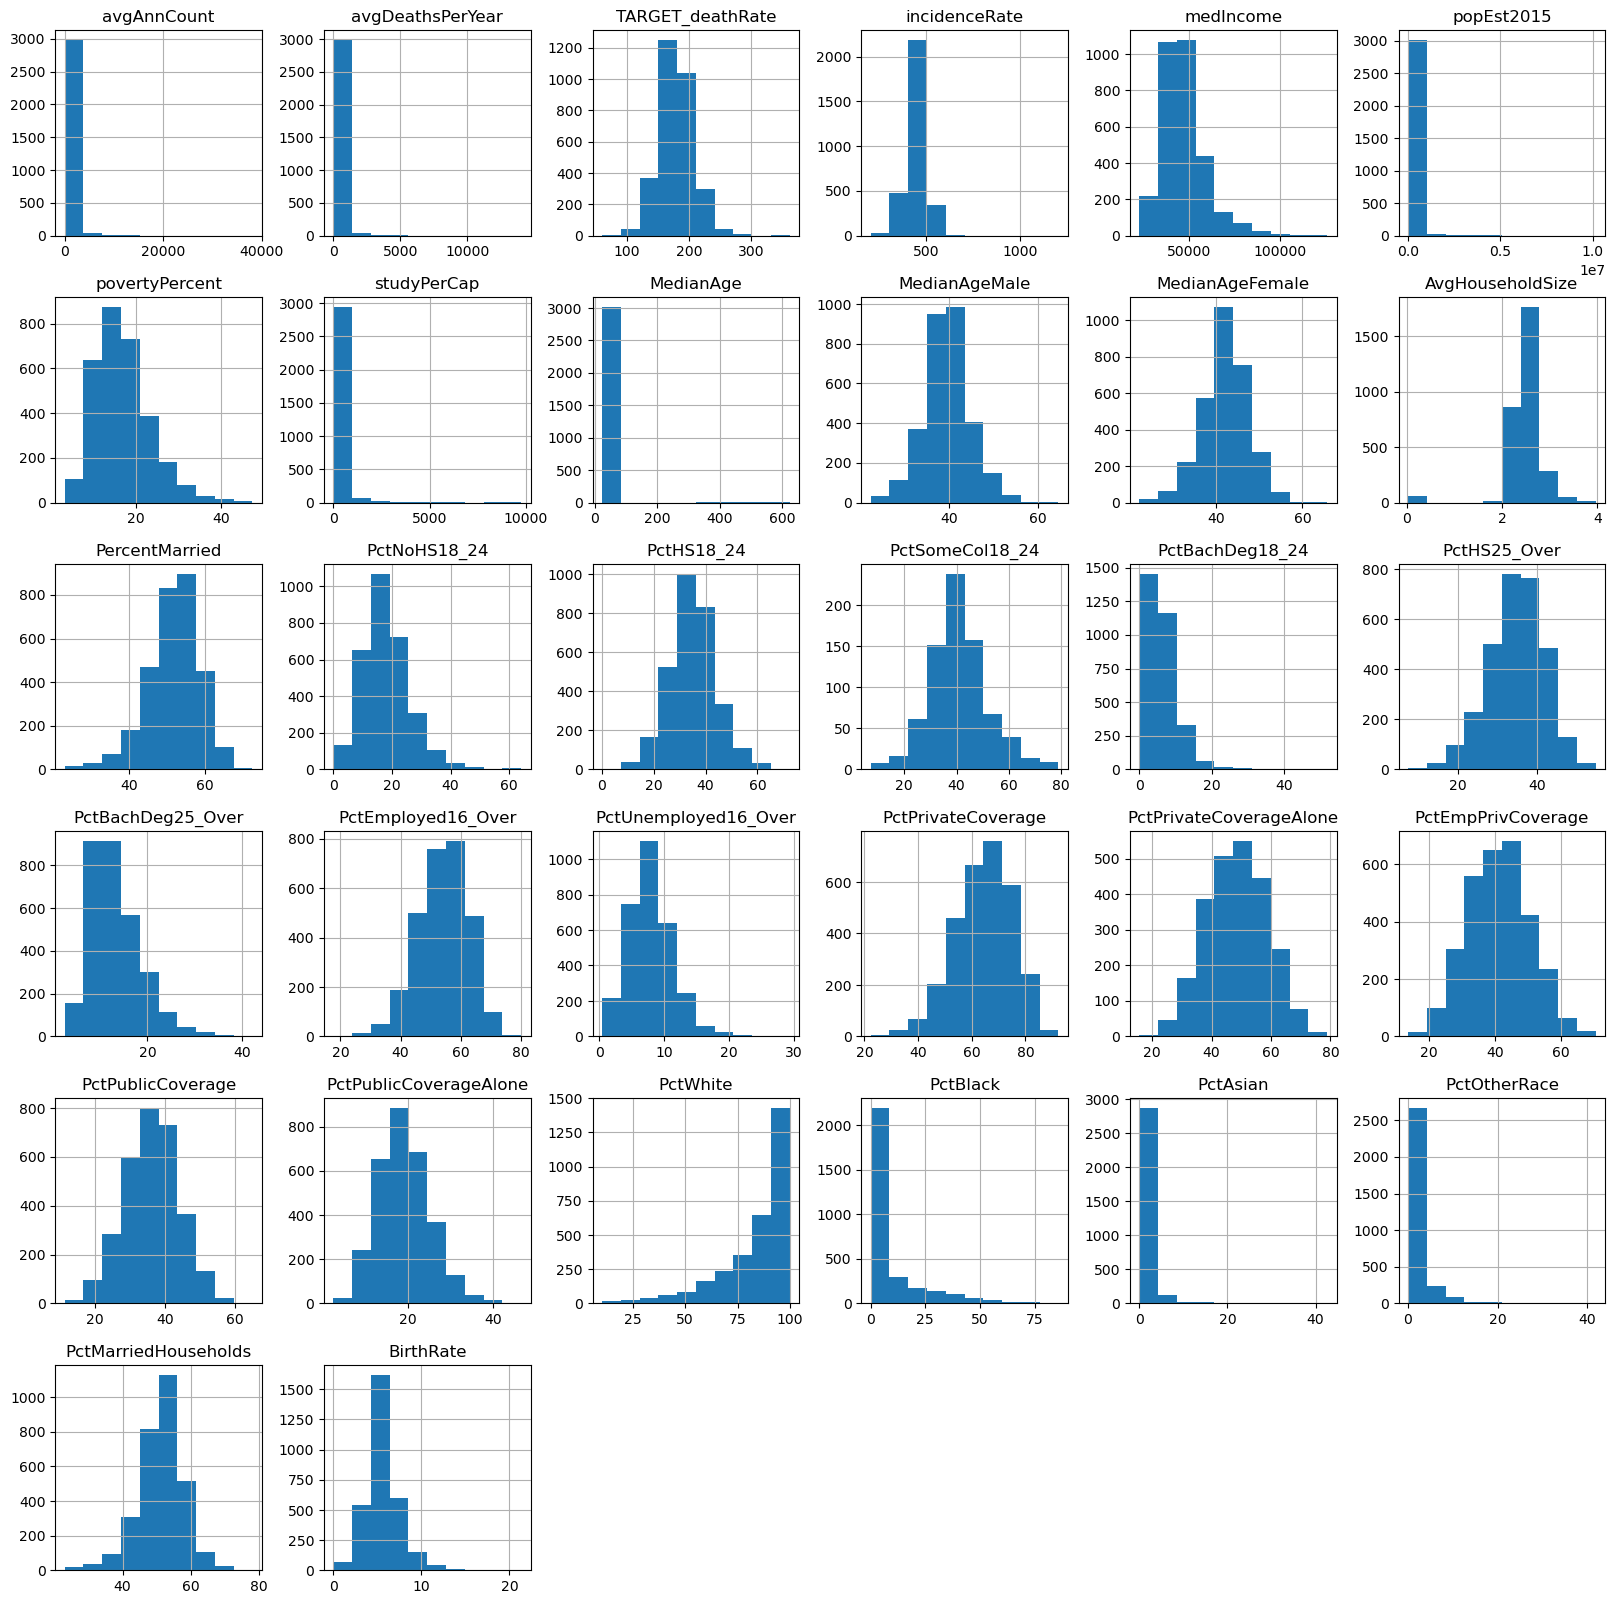

In [6]:
DF.hist(figsize=(20,20))
plt.show()

In [7]:
DF.isna().any()

avgAnnCount                False
avgDeathsPerYear           False
TARGET_deathRate           False
incidenceRate              False
medIncome                  False
popEst2015                 False
povertyPercent             False
studyPerCap                False
MedianAge                  False
MedianAgeMale              False
MedianAgeFemale            False
Geography                  False
AvgHouseholdSize           False
PercentMarried             False
PctNoHS18_24               False
PctHS18_24                 False
PctSomeCol18_24             True
PctBachDeg18_24            False
PctHS25_Over               False
PctBachDeg25_Over          False
PctEmployed16_Over          True
PctUnemployed16_Over       False
PctPrivateCoverage         False
PctPrivateCoverageAlone     True
PctEmpPrivCoverage         False
PctPublicCoverage          False
PctPublicCoverageAlone     False
PctWhite                   False
PctBlack                   False
PctAsian                   False
PctOtherRa

we notice that the columns "PctSomeCol18_24" , "PctEmployed16_Over", and "PctPrivateCoverageAlone" have null values

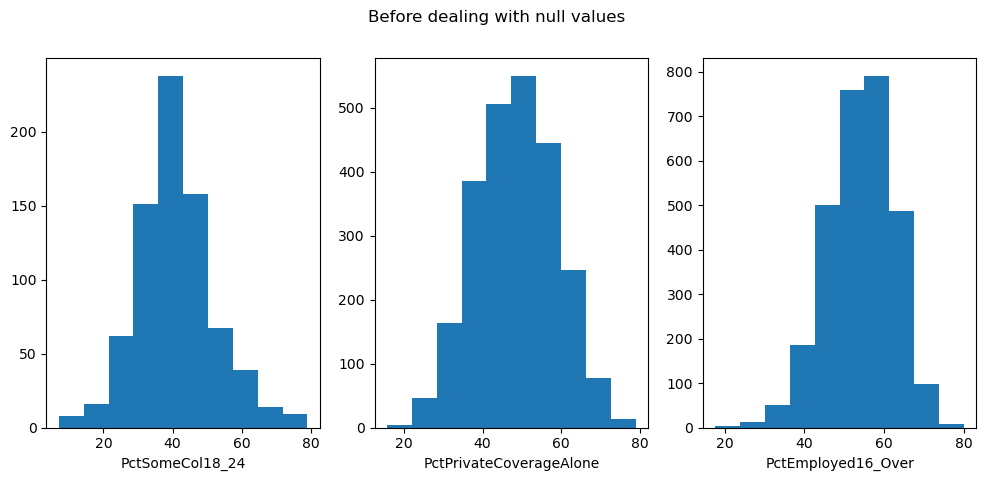

In [8]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("Before dealing with null values")
ax[0].hist(DF['PctSomeCol18_24'])
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'])
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'])
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

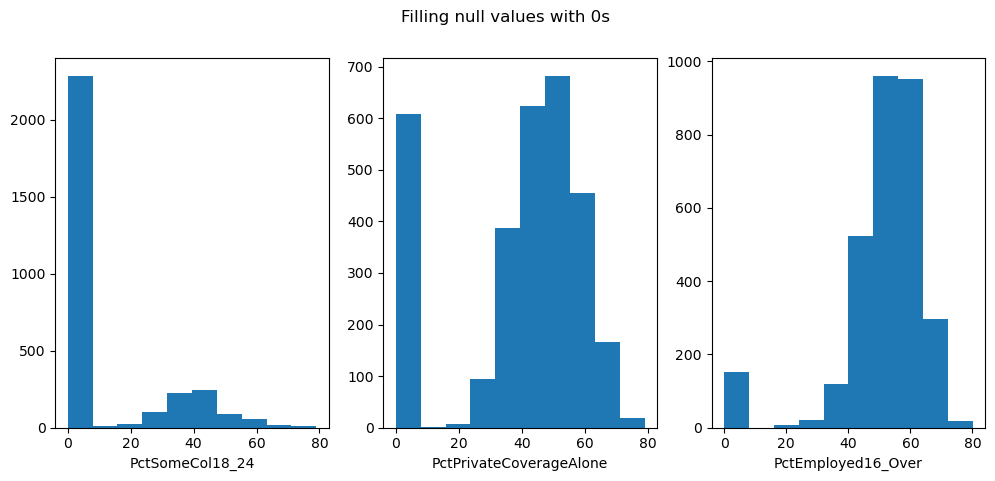

In [9]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("Filling null values with 0s")
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(0))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(0))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(0))
ax[2].set_xlabel('PctEmployed16_Over')
fig.set_label('fill non values with 0s')
plt.show()

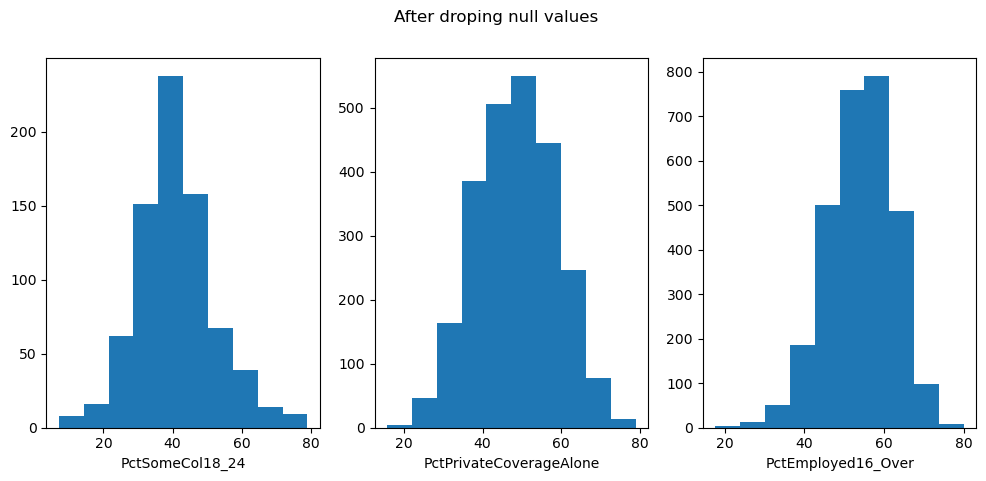

In [10]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("After droping null values")
ax[0].hist(DF['PctSomeCol18_24'].dropna())
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].dropna())
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].dropna())
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

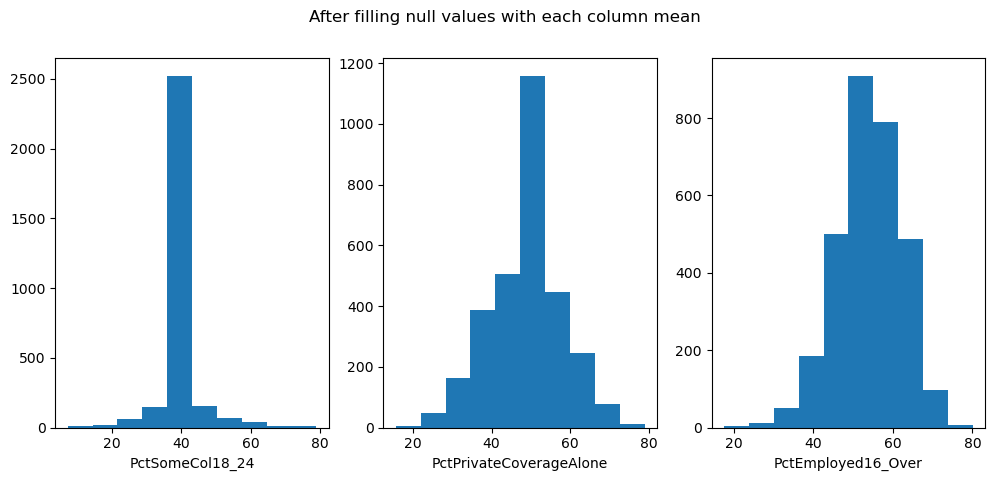

In [11]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("After filling null values with each column mean")
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(DF['PctSomeCol18_24'].mean()))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(DF['PctPrivateCoverageAlone'].mean()))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(DF['PctEmployed16_Over'].mean()))
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

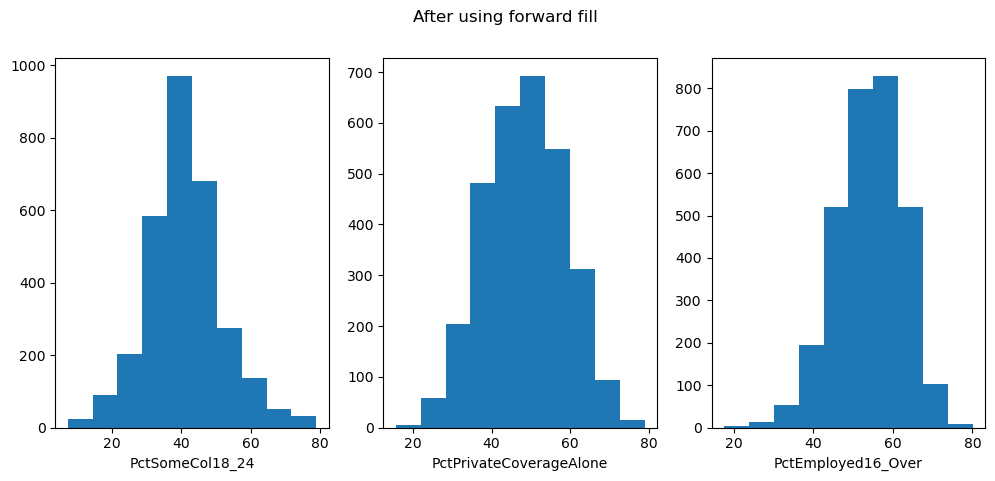

In [12]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("After using forward fill")
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(DF['PctSomeCol18_24'].ffill()))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(DF['PctPrivateCoverageAlone'].ffill()))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(DF['PctEmployed16_Over'].ffill()))
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

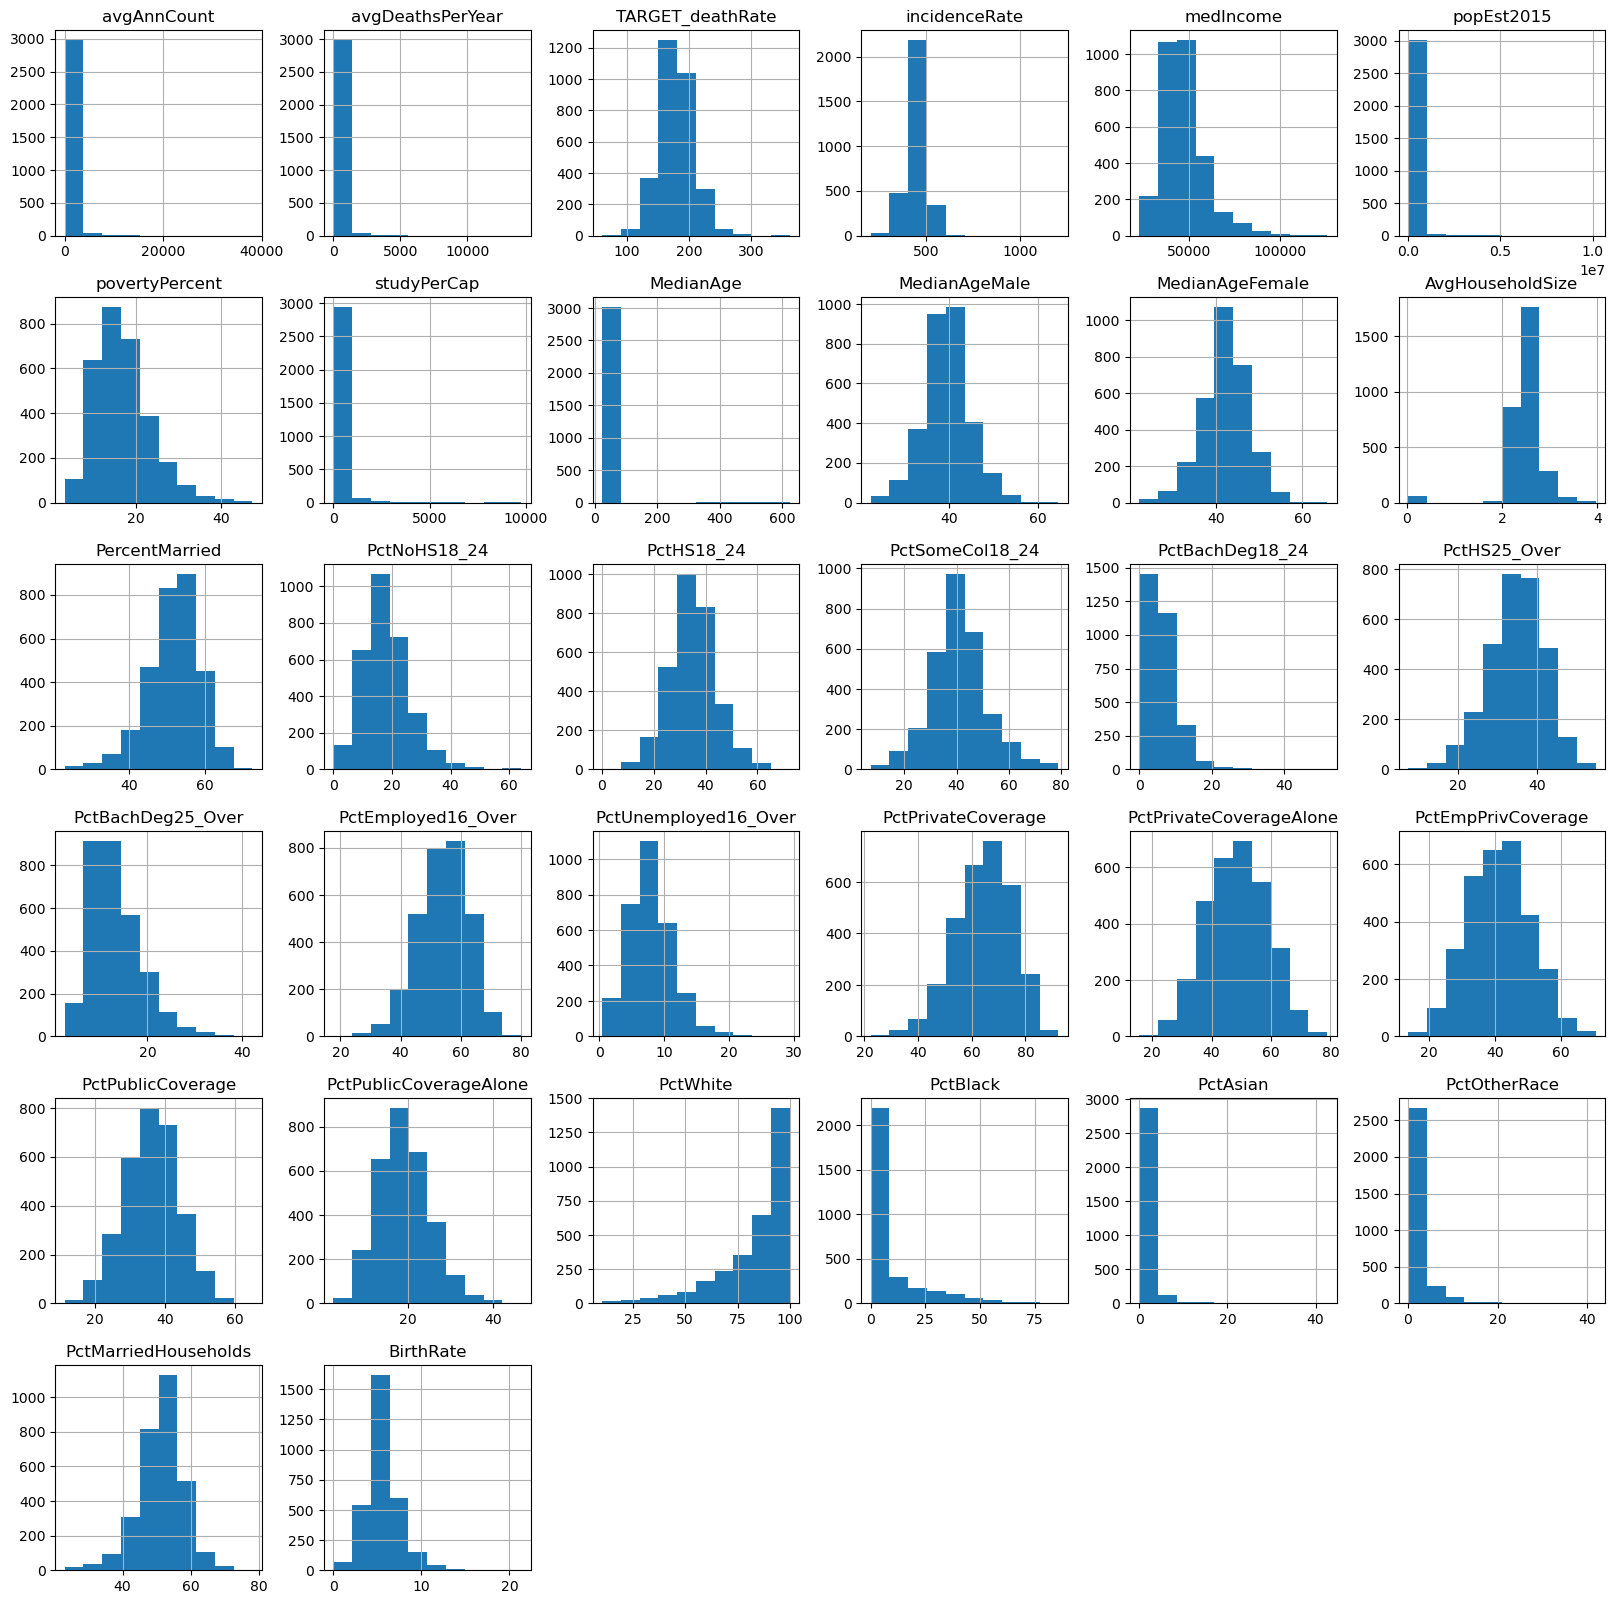

In [13]:
DF["PctSomeCol18_24"] = DF["PctSomeCol18_24"].ffill()
DF["PctEmployed16_Over"] = DF["PctEmployed16_Over"].ffill()
DF['PctPrivateCoverageAlone'] = DF['PctPrivateCoverageAlone'].ffill()
DF.hist(figsize=(20,20))
plt.show()

In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

### Adding a city & district columns to draw a plot for the average target death rate per year for each city

In [15]:
DF['City'] = DF['Geography'].str.split(',').str[1]
DF['District'] = DF['Geography'].str.split(',').str[0]

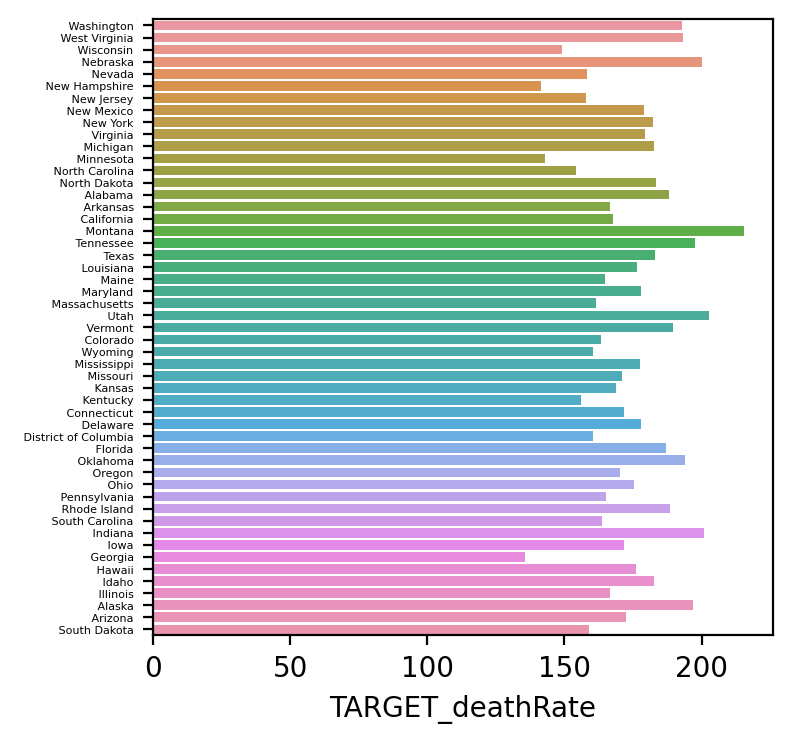

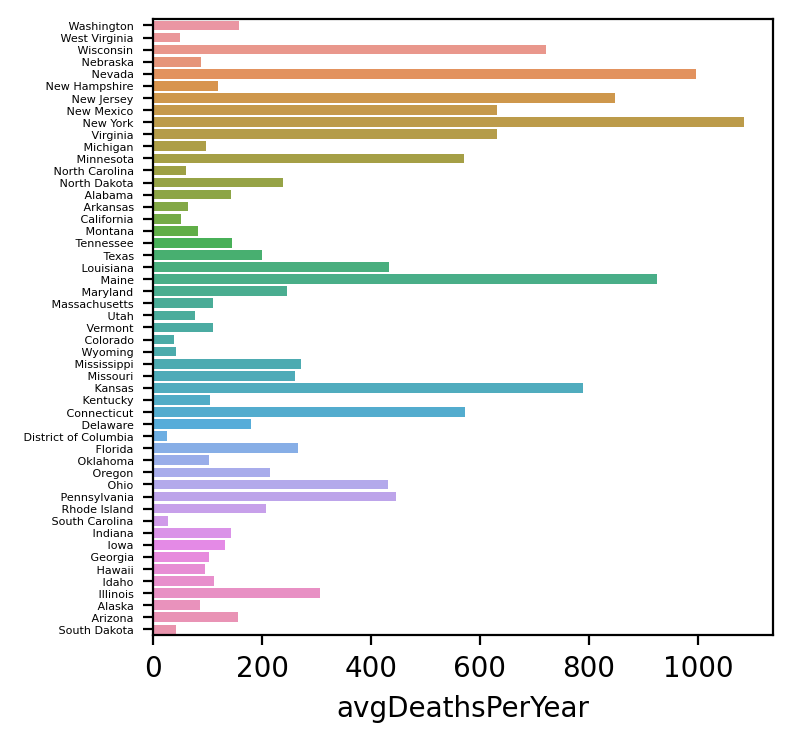

In [16]:
fig1 = plt.figure(figsize=(4, 4), dpi=200)
ax1 = sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['TARGET_deathRate'].mean()[:])
ax1.set_yticklabels(DF['City'].unique(), fontsize=4)
fig2 = plt.figure(figsize=(4, 4), dpi=200)
ax2 = sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['avgDeathsPerYear'].mean()[:])
ax2.set_yticklabels(DF['City'].unique(), fontsize=4)
plt.show()

# Data visualization

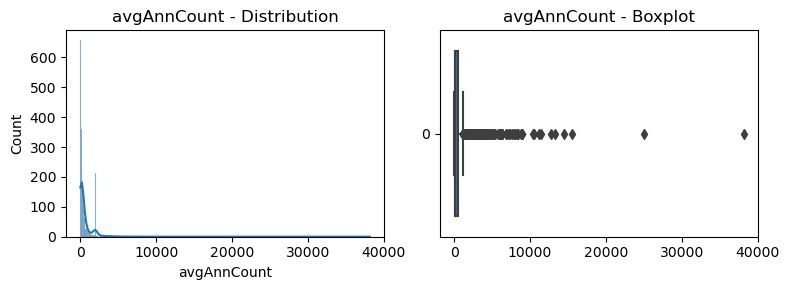

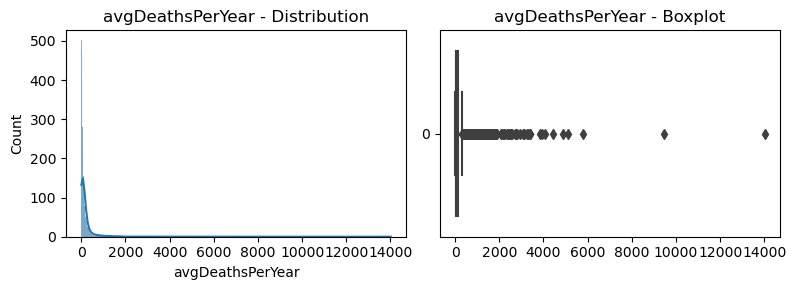

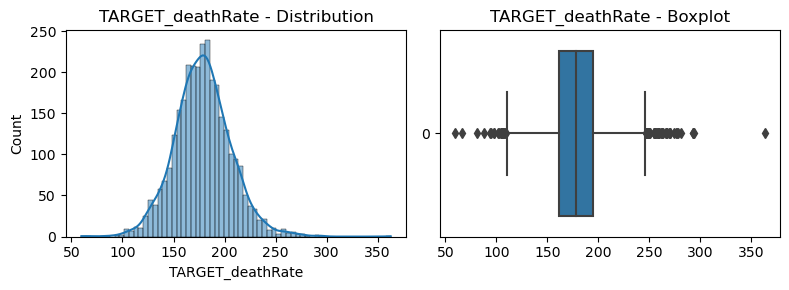

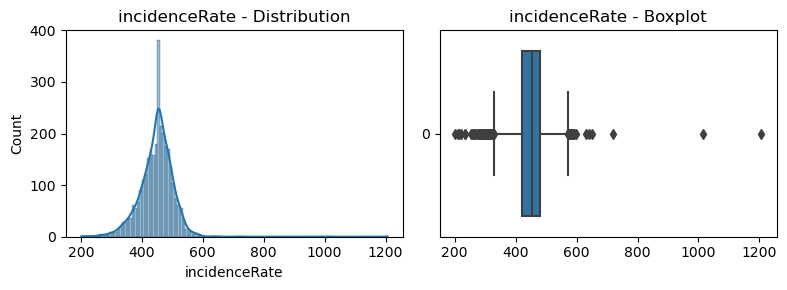

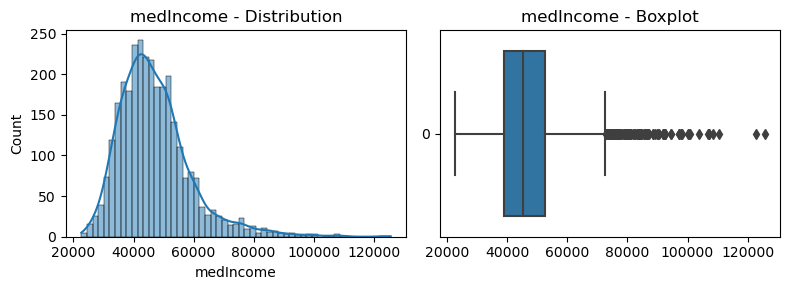

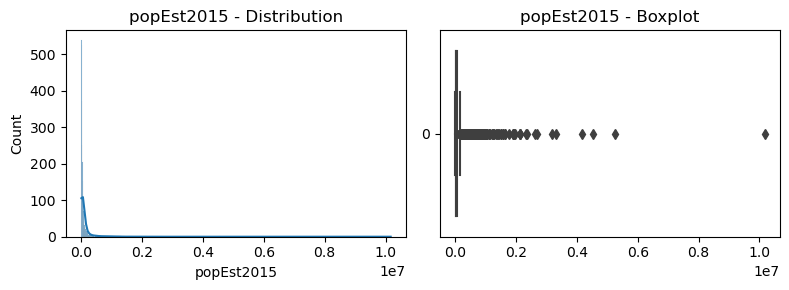

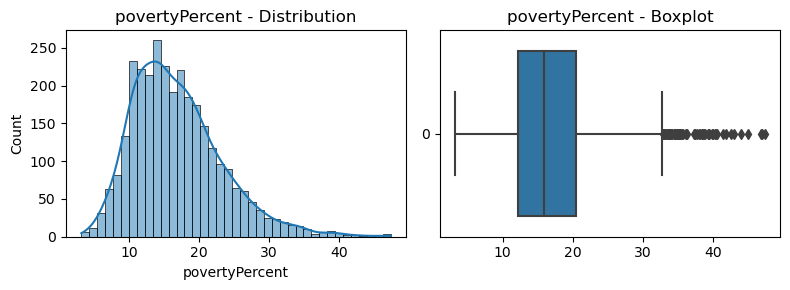

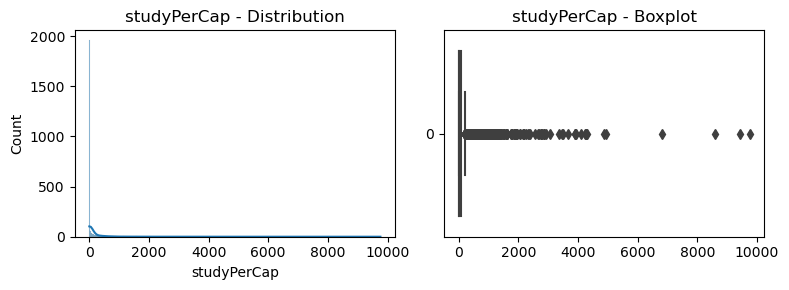

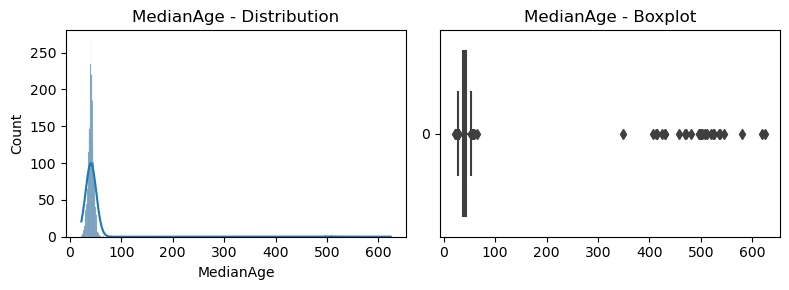

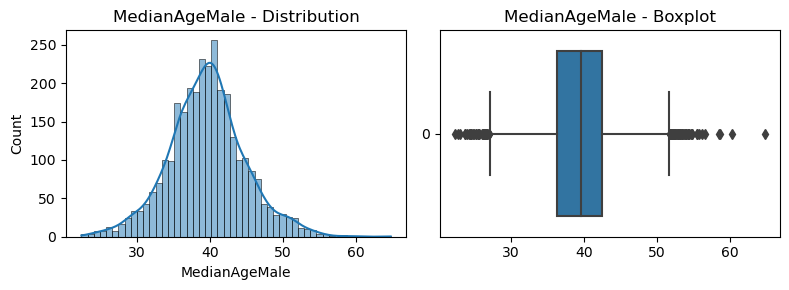

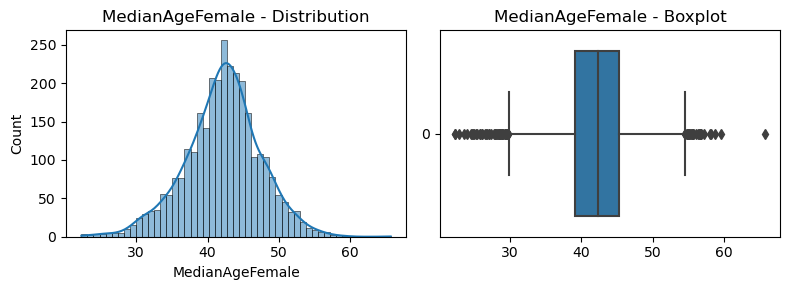

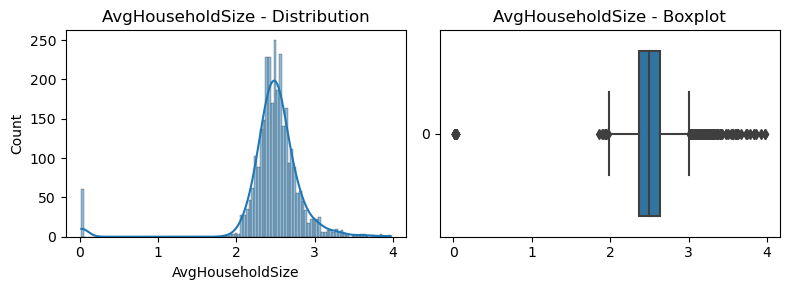

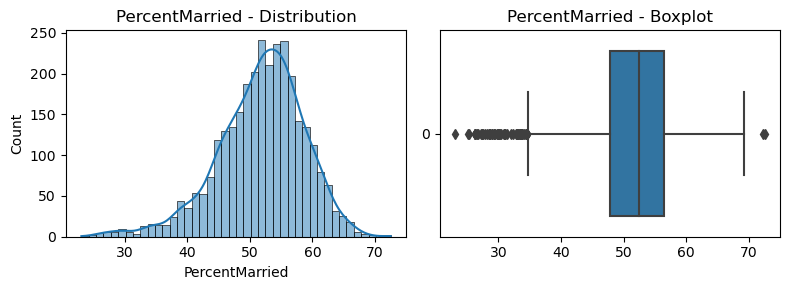

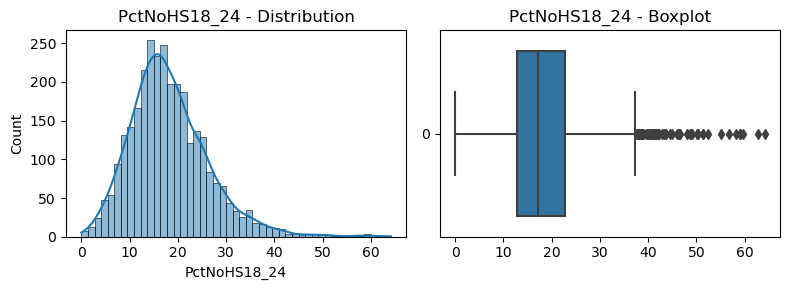

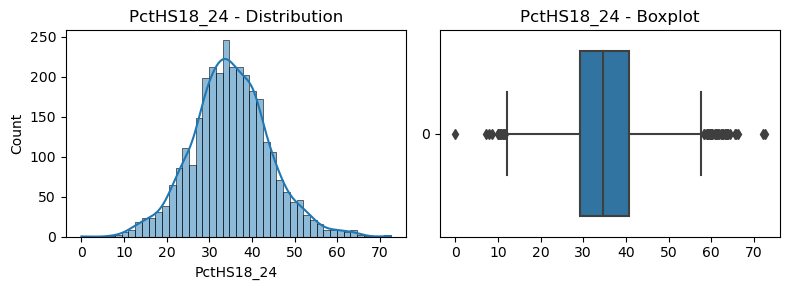

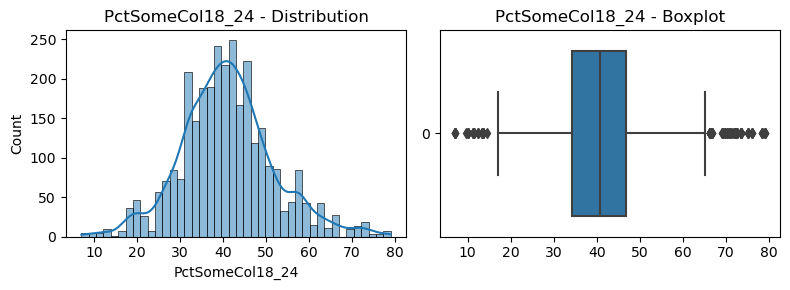

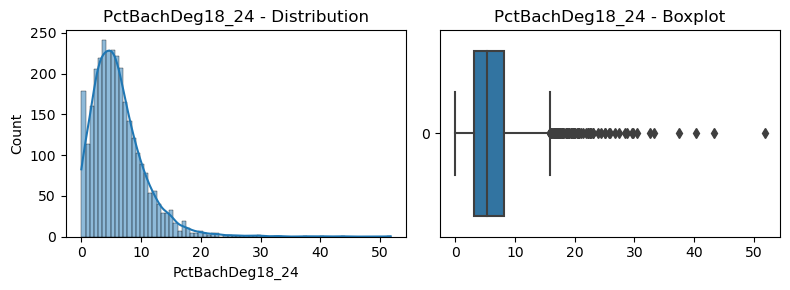

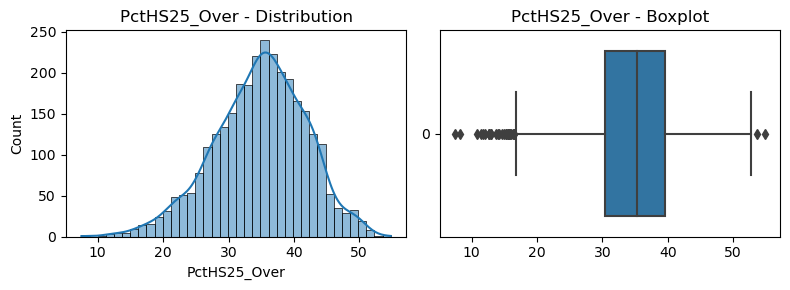

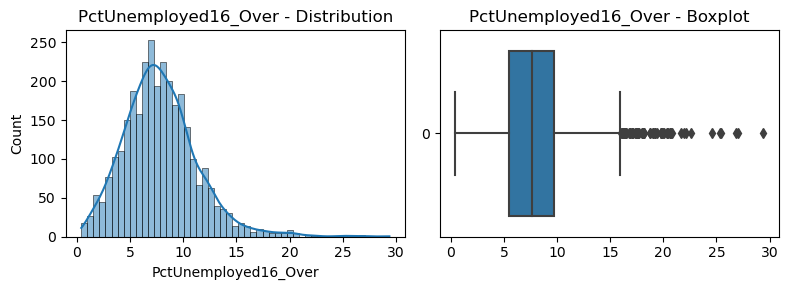

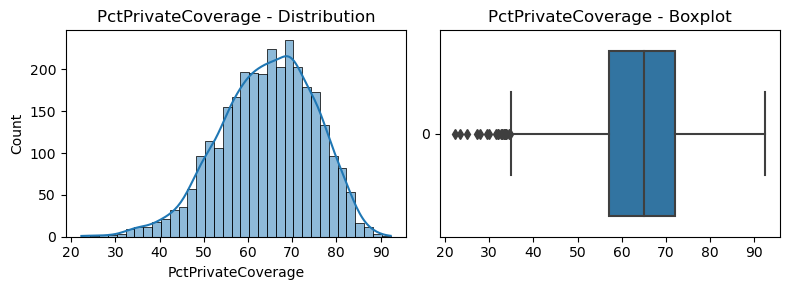

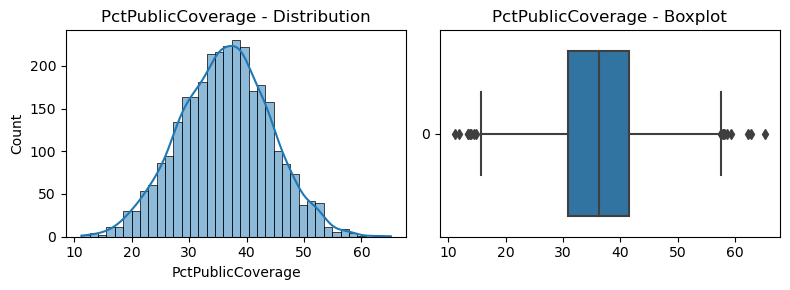

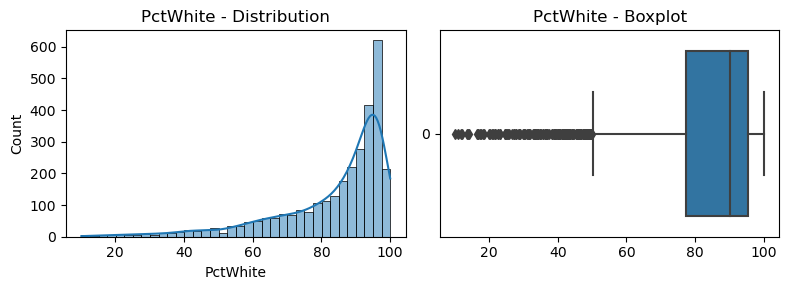

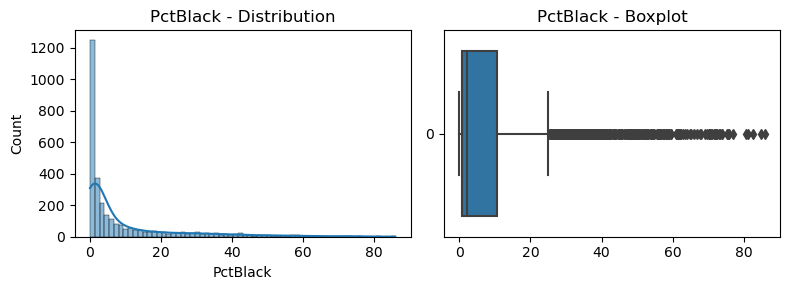

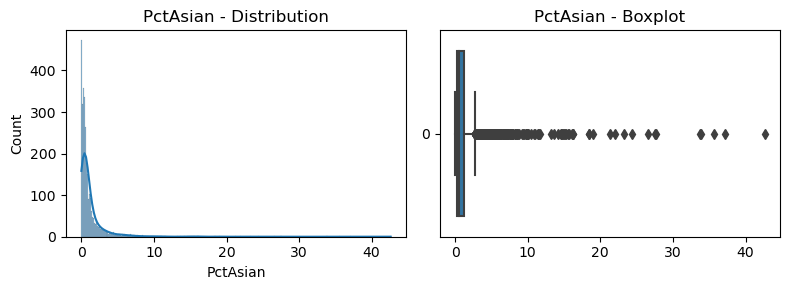

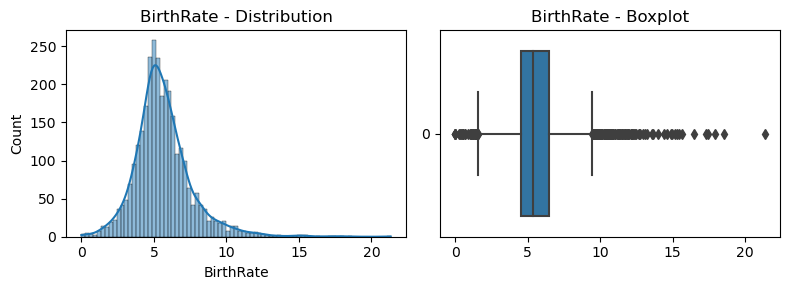

In [17]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

## Catching outliers 
we can do so using 2 ways 
* Interquartile range 
* Z-score 


  we will go with the z-score(normal distribution) and removing the data points that are not in the area that represents µ ± 3σ.  
  we will have to visualize the data using scatter plot and draw the distribution.  
  box plot will help in identifing the outliers. 

### Interquartile range 


In [18]:
for i in DF.columns:
    if i == 'binnedInc' or i =='City' or i == 'Geography' or i == 'District' or i == 'studyPerCap' or i == 'popEst2015' or i == 'PctPrivateCoverageAlone':
        continue
    Q1 = np.percentile(DF[f"{i}"], 25, method='midpoint')
    Q2 = np.percentile(DF[f"{i}"], 50, method='midpoint')
    Q3 = np.percentile(DF[f"{i}"], 75, method='midpoint')
    iqr = Q3-Q1  
    #iqr_with_scipy = stats.iqr(DF[f"{i}"],interpolation='midpoint') using scipy (from scipy import stats)
    DF[f"{i}"] = DF[f"{i}"][(DF[f"{i}"]<(Q3+1.5*iqr)) & (DF[f"{i}"]>(Q1-1.5*iqr))]

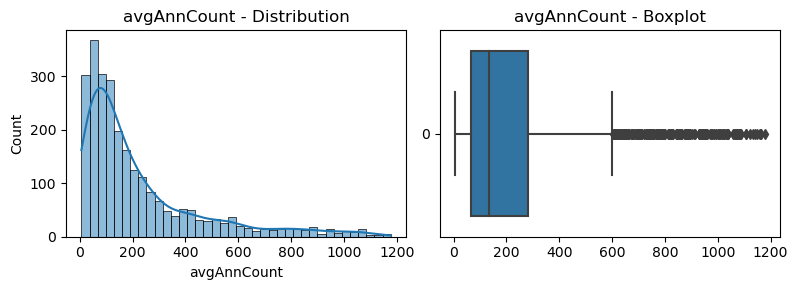

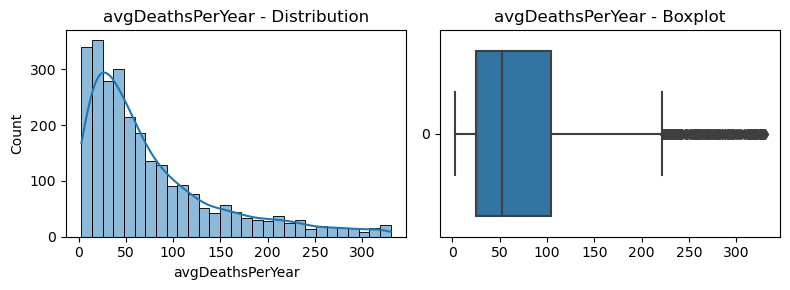

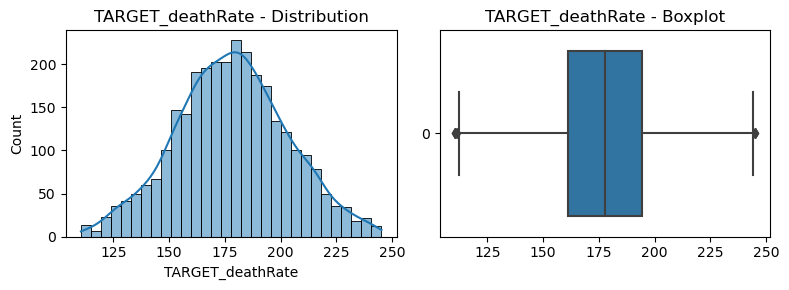

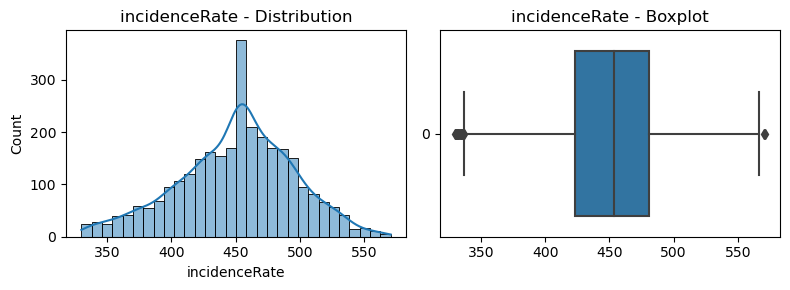

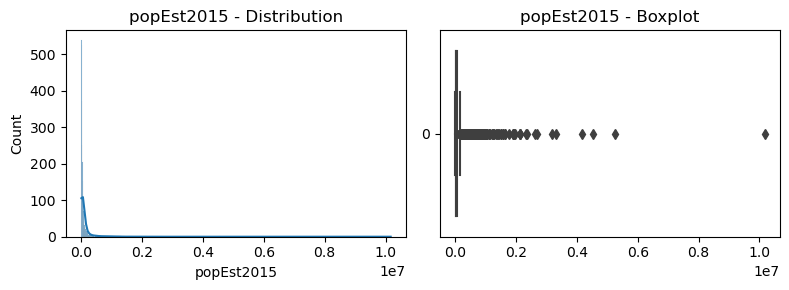

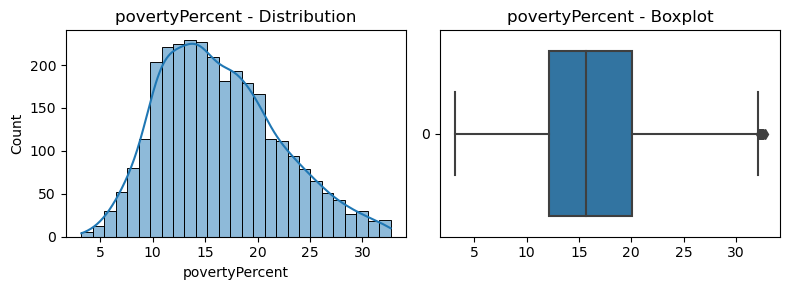

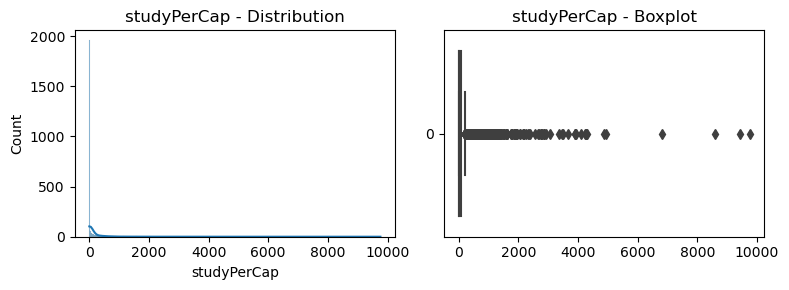

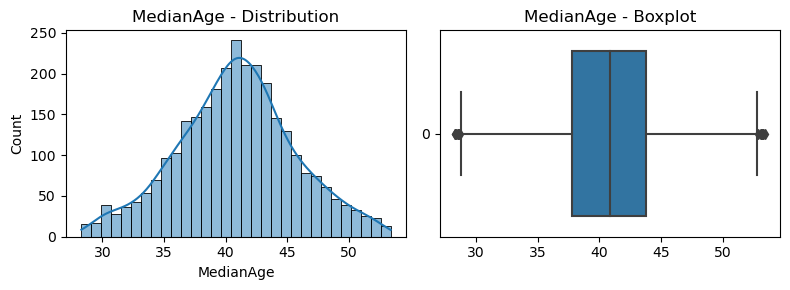

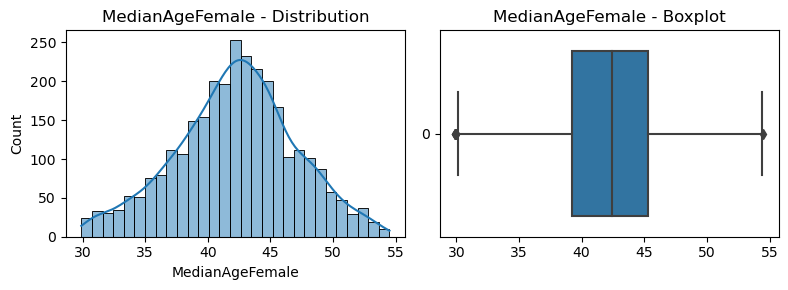

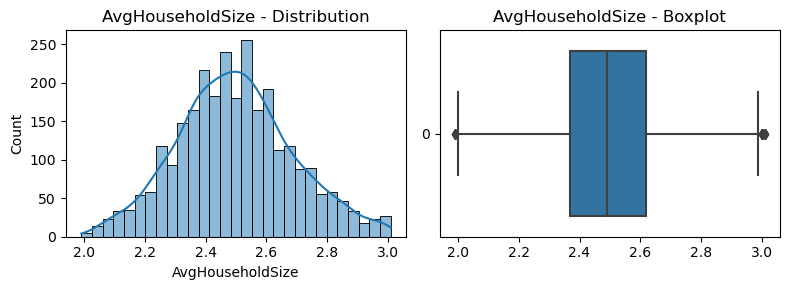

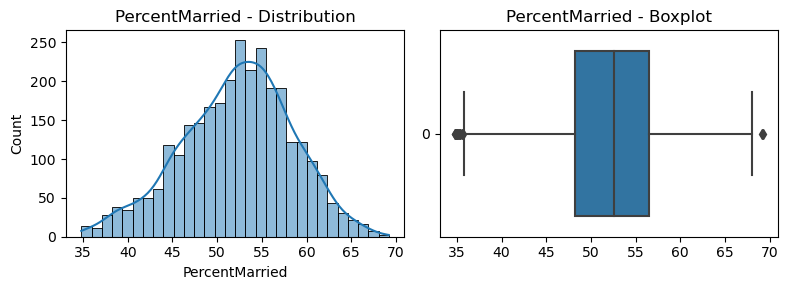

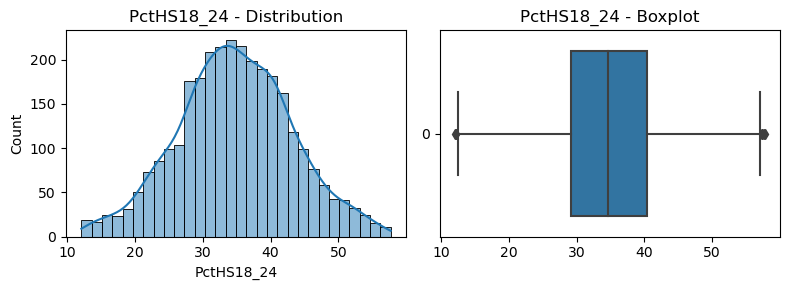

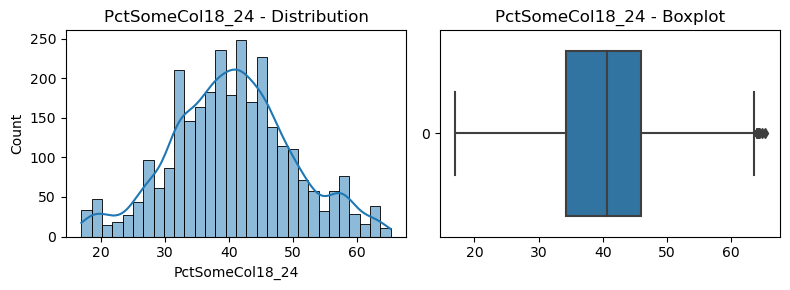

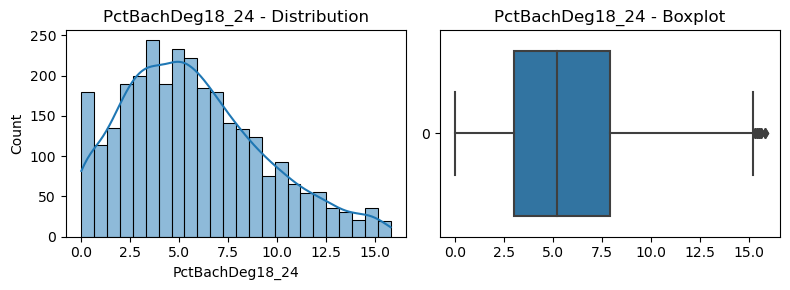

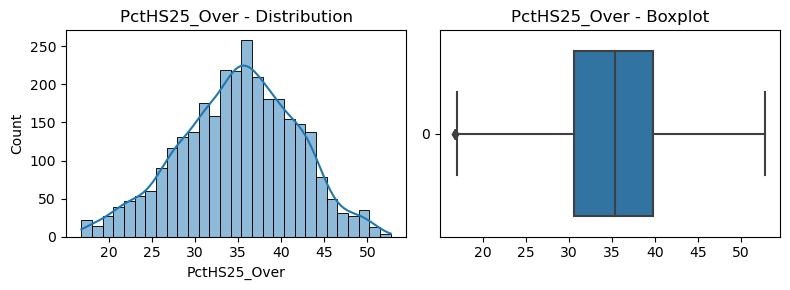

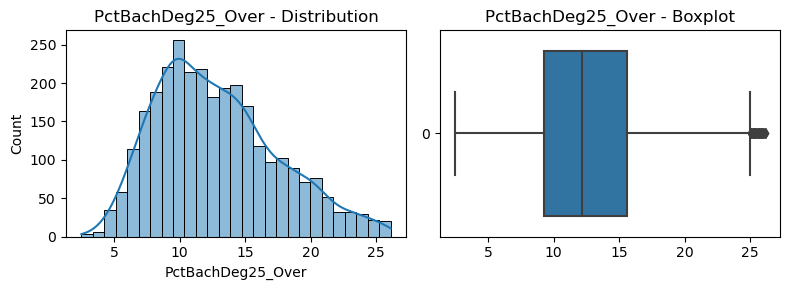

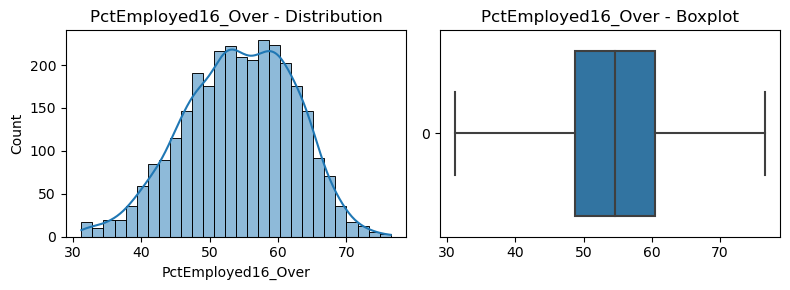

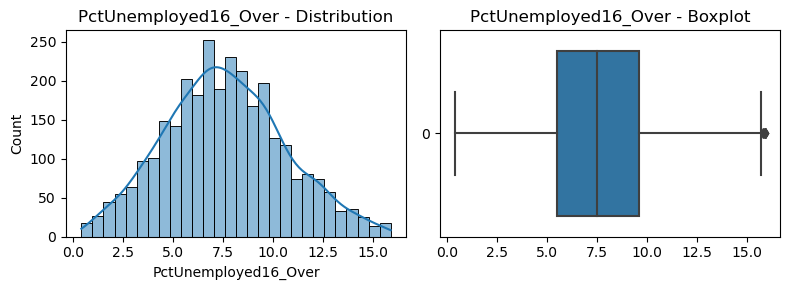

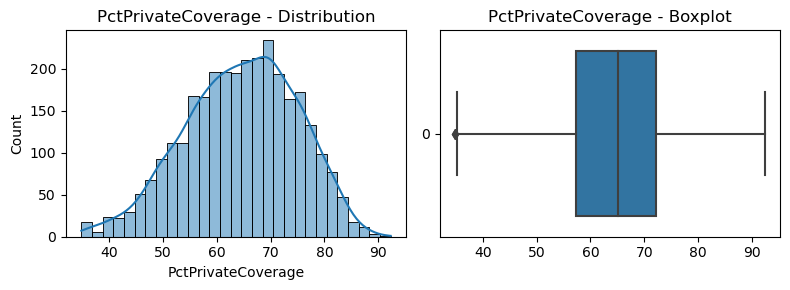

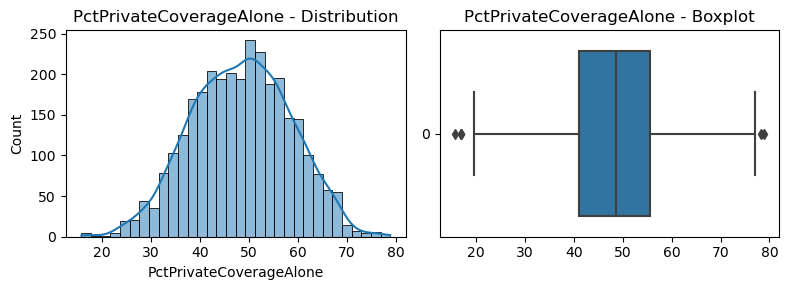

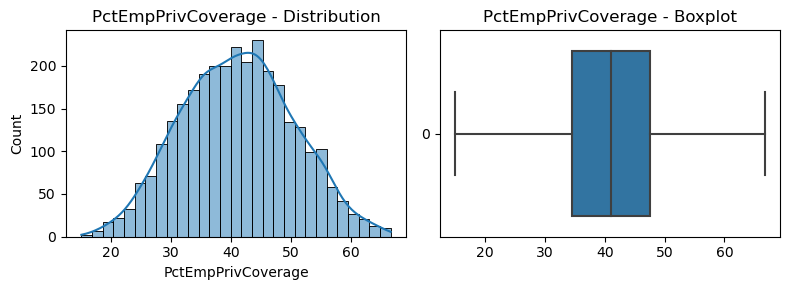

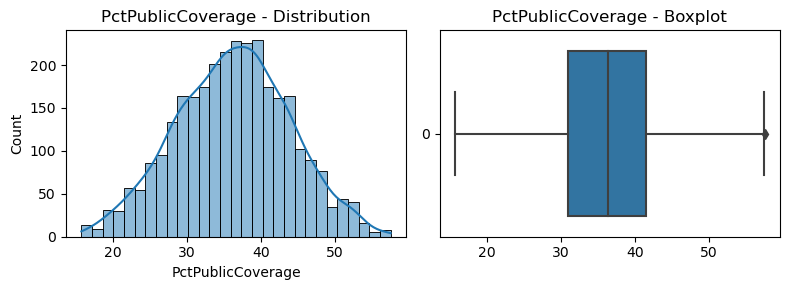

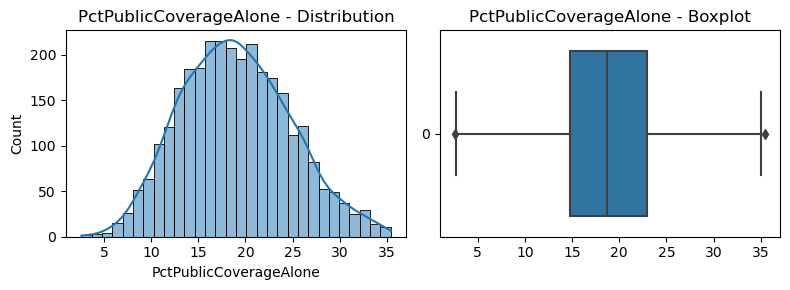

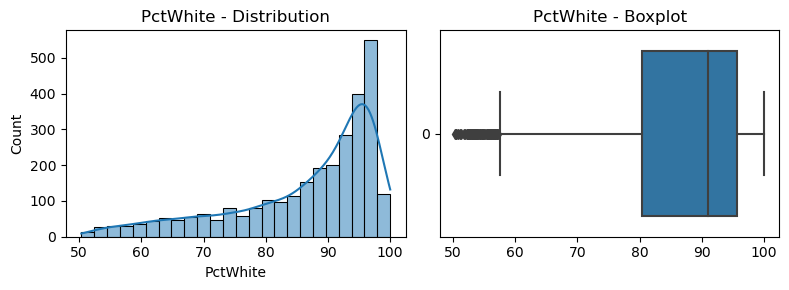

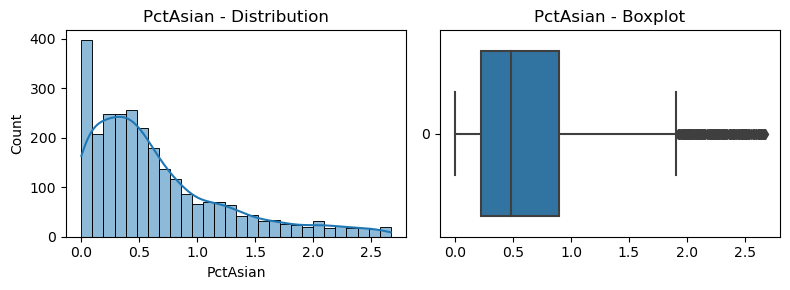

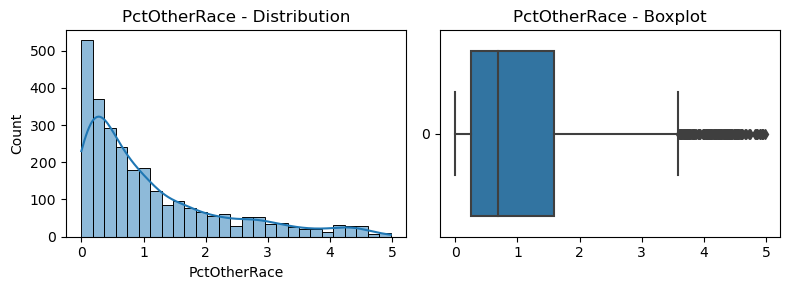

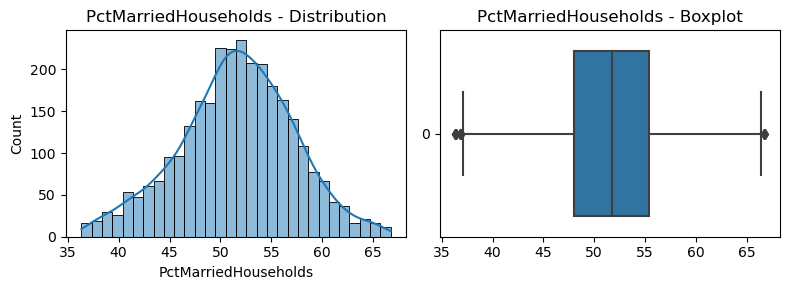

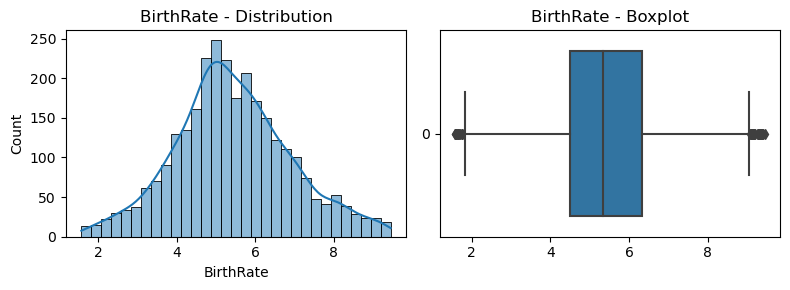

In [19]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

In [20]:
table = DF.corr(method='pearson', numeric_only=True)
table['TARGET_deathRate']

avgAnnCount               -0.045015
avgDeathsPerYear           0.070902
TARGET_deathRate           1.000000
incidenceRate              0.393332
medIncome                 -0.400594
popEst2015                -0.127569
povertyPercent             0.400301
studyPerCap               -0.035002
MedianAge                  0.022105
MedianAgeMale              0.001067
MedianAgeFemale            0.034494
AvgHouseholdSize           0.068959
PercentMarried            -0.243139
PctNoHS18_24               0.116030
PctHS18_24                 0.260077
PctSomeCol18_24           -0.127161
PctBachDeg18_24           -0.225769
PctHS25_Over               0.389953
PctBachDeg25_Over         -0.435021
PctEmployed16_Over        -0.381089
PctUnemployed16_Over       0.367553
PctPrivateCoverage        -0.386774
PctPrivateCoverageAlone   -0.302710
PctEmpPrivCoverage        -0.254927
PctPublicCoverage          0.376922
PctPublicCoverageAlone     0.424369
PctWhite                  -0.094762
PctBlack                   0

<Axes: >

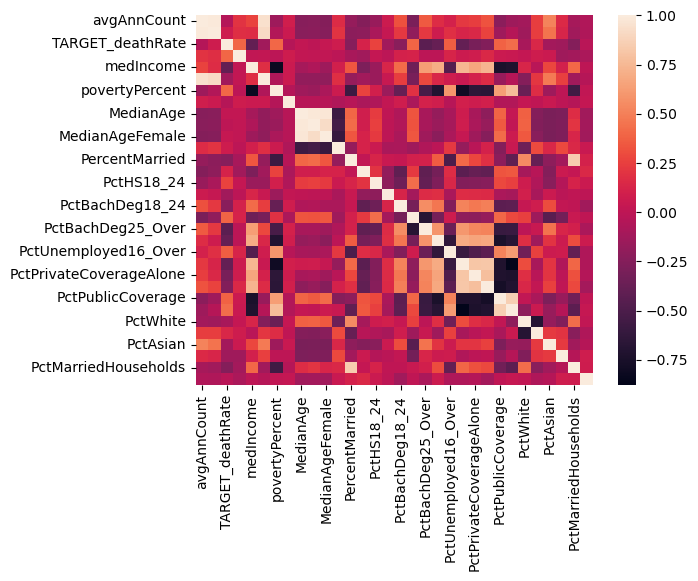

In [21]:
sns.heatmap(DF.corr(numeric_only=True))

<Axes: >

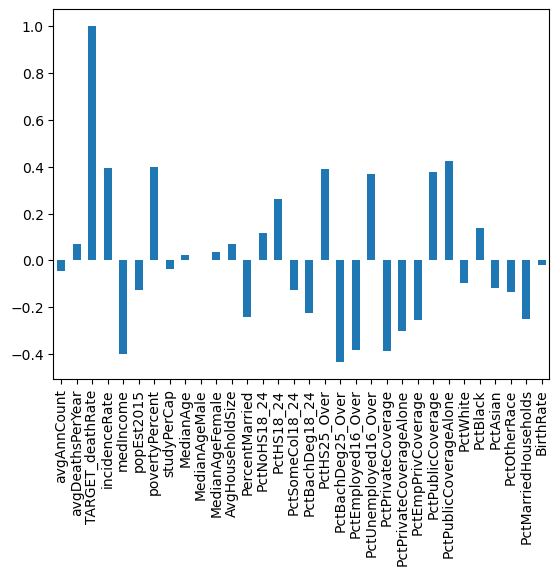

In [22]:
table['TARGET_deathRate'].plot(kind='bar')

In [23]:
# sns.pairplot(table)
# plt.show()

In [24]:
selected = ['TARGET_deathRate','incidenceRate', 'medIncome', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctPublicCoverage',
                                'PctPublicCoverageAlone']
selected1 = ['incidenceRate', 'medIncome', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctPublicCoverage',
                                'PctPublicCoverageAlone']

In [25]:
table = DF[selected].corr(method='pearson', numeric_only=True)

In [26]:
target_table = table['TARGET_deathRate']
new_target_table = target_table[selected]
selected_DF = DF[selected]
print(new_target_table)

TARGET_deathRate           1.000000
incidenceRate              0.393332
medIncome                 -0.400594
povertyPercent             0.400301
PctHS25_Over               0.389953
PctBachDeg25_Over         -0.435021
PctEmployed16_Over        -0.381089
PctUnemployed16_Over       0.367553
PctPrivateCoverage        -0.386774
PctPrivateCoverageAlone   -0.302710
PctPublicCoverage          0.376922
PctPublicCoverageAlone     0.424369
Name: TARGET_deathRate, dtype: float64


In [27]:
features_mean = DF[selected].mean()
print(features_mean)

TARGET_deathRate             177.997687
incidenceRate                450.403379
medIncome                  45532.200684
povertyPercent                16.413600
PctHS25_Over                  34.992905
PctBachDeg25_Over             12.817470
PctEmployed16_Over            54.372165
PctUnemployed16_Over           7.596744
PctPrivateCoverage            64.586814
PctPrivateCoverageAlone       48.419698
PctPublicCoverage             36.235655
PctPublicCoverageAlone        19.010661
dtype: float64


In [28]:
features_median = DF[selected].median()
print(features_median)

TARGET_deathRate             177.900000
incidenceRate                453.549422
medIncome                  44716.000000
povertyPercent                15.700000
PctHS25_Over                  35.300000
PctBachDeg25_Over             12.200000
PctEmployed16_Over            54.600000
PctUnemployed16_Over           7.500000
PctPrivateCoverage            65.200000
PctPrivateCoverageAlone       48.700000
PctPublicCoverage             36.300000
PctPublicCoverageAlone        18.700000
dtype: float64


In [29]:
features_mode = DF[selected].mode()
print(features_mode) # will have multiple rows because maybe there is more than one mode for each feature

   TARGET_deathRate  incidenceRate  medIncome  povertyPercent  PctHS25_Over  \
0             184.3     453.549422    34116.0            13.9          35.6   
1               NaN            NaN    36627.0             NaN           NaN   
2               NaN            NaN    42582.0             NaN           NaN   
3               NaN            NaN    48368.0             NaN           NaN   
4               NaN            NaN    51175.0             NaN           NaN   

   PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
0                9.0                51.9                   6.8   
1                NaN                57.9                   6.9   
2                NaN                 NaN                   NaN   
3                NaN                 NaN                   NaN   
4                NaN                 NaN                   NaN   

   PctPrivateCoverage  PctPrivateCoverageAlone  PctPublicCoverage  \
0                65.3                     45.1             

In [30]:
features_std = DF[selected].std()
print(features_std)

TARGET_deathRate             25.042515
incidenceRate                44.922308
medIncome                  9378.964441
povertyPercent                5.672660
PctHS25_Over                  6.742084
PctBachDeg25_Over             4.641630
PctEmployed16_Over            8.004175
PctUnemployed16_Over          3.012282
PctPrivateCoverage           10.307859
PctPrivateCoverageAlone      10.041618
PctPublicCoverage             7.657359
PctPublicCoverageAlone        5.770066
dtype: float64


In [31]:
features_range = DF[selected].mean()
for column in selected:
    max = DF[column].max()
    min = DF[column].min()
    features_range[column] = "(" + str(min) + " - " + str(max) + ")"

print(features_range)

TARGET_deathRate               (110.4 - 245.2)
incidenceRate                  (329.9 - 570.8)
medIncome                  (22640.0 - 72648.0)
povertyPercent                    (3.2 - 32.7)
PctHS25_Over                     (16.8 - 52.7)
PctBachDeg25_Over                 (2.5 - 26.1)
PctEmployed16_Over               (31.2 - 76.5)
PctUnemployed16_Over              (0.4 - 15.9)
PctPrivateCoverage               (34.9 - 92.3)
PctPrivateCoverageAlone          (15.7 - 78.9)
PctPublicCoverage                (15.7 - 57.5)
PctPublicCoverageAlone            (2.6 - 35.4)
dtype: object


# Standardization

In [32]:
for feature in selected:
    selected_DF[feature] = selected_DF[feature] - features_mean[feature]
    selected_DF[feature] = selected_DF[feature] / features_std[feature]

selected_DF.head()

C:\Users\mohamed ibrahim\AppData\Local\Temp\ipykernel_27168\2760964739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_DF[feature] = selected_DF[feature] - features_mean[feature]
C:\Users\mohamed ibrahim\AppData\Local\Temp\ipykernel_27168\2760964739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_DF[feature] = selected_DF[feature] / features_std[feature]


TARGET_deathRate  incidenceRate  medIncome  povertyPercent  PctHS25_Over  \
0         -0.523018       0.876995   1.744947       -0.919075     -1.749148   
1         -0.666774      -0.863789   0.276662        0.385428     -1.333846   
2         -0.131684      -2.241723   0.406847       -0.319709     -0.888880   
3          0.670951      -0.445288  -0.137457        0.121001     -0.503243   
4         -1.341626      -2.232819   0.471566       -0.689906     -0.236263   

   PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
0           1.461239           -0.308859              0.133871   
1           2.129108            0.190880              0.067476   
2           0.685649           -1.058468             -0.198104   
3          -0.757809           -0.758625              1.494965   
4           0.470208           -0.771118             -0.928447   

   PctPrivateCoverage  PctPrivateCoverageAlone  PctPublicCoverage  \
0            1.019919                      NaN          -0.435614   
1            0.544554                 0.535800          -0.670682   
2           -0.086033                -0.489931           0.765844   
3           -0.600204                -0.808605           1.183743   
4           -0.289761                -0.450097           1.013972   

   PctPublicCoverageAlone  
0               -0.868389  
1               -0.643088  
2                0.362100  
3                1.038002  
4                0.639393

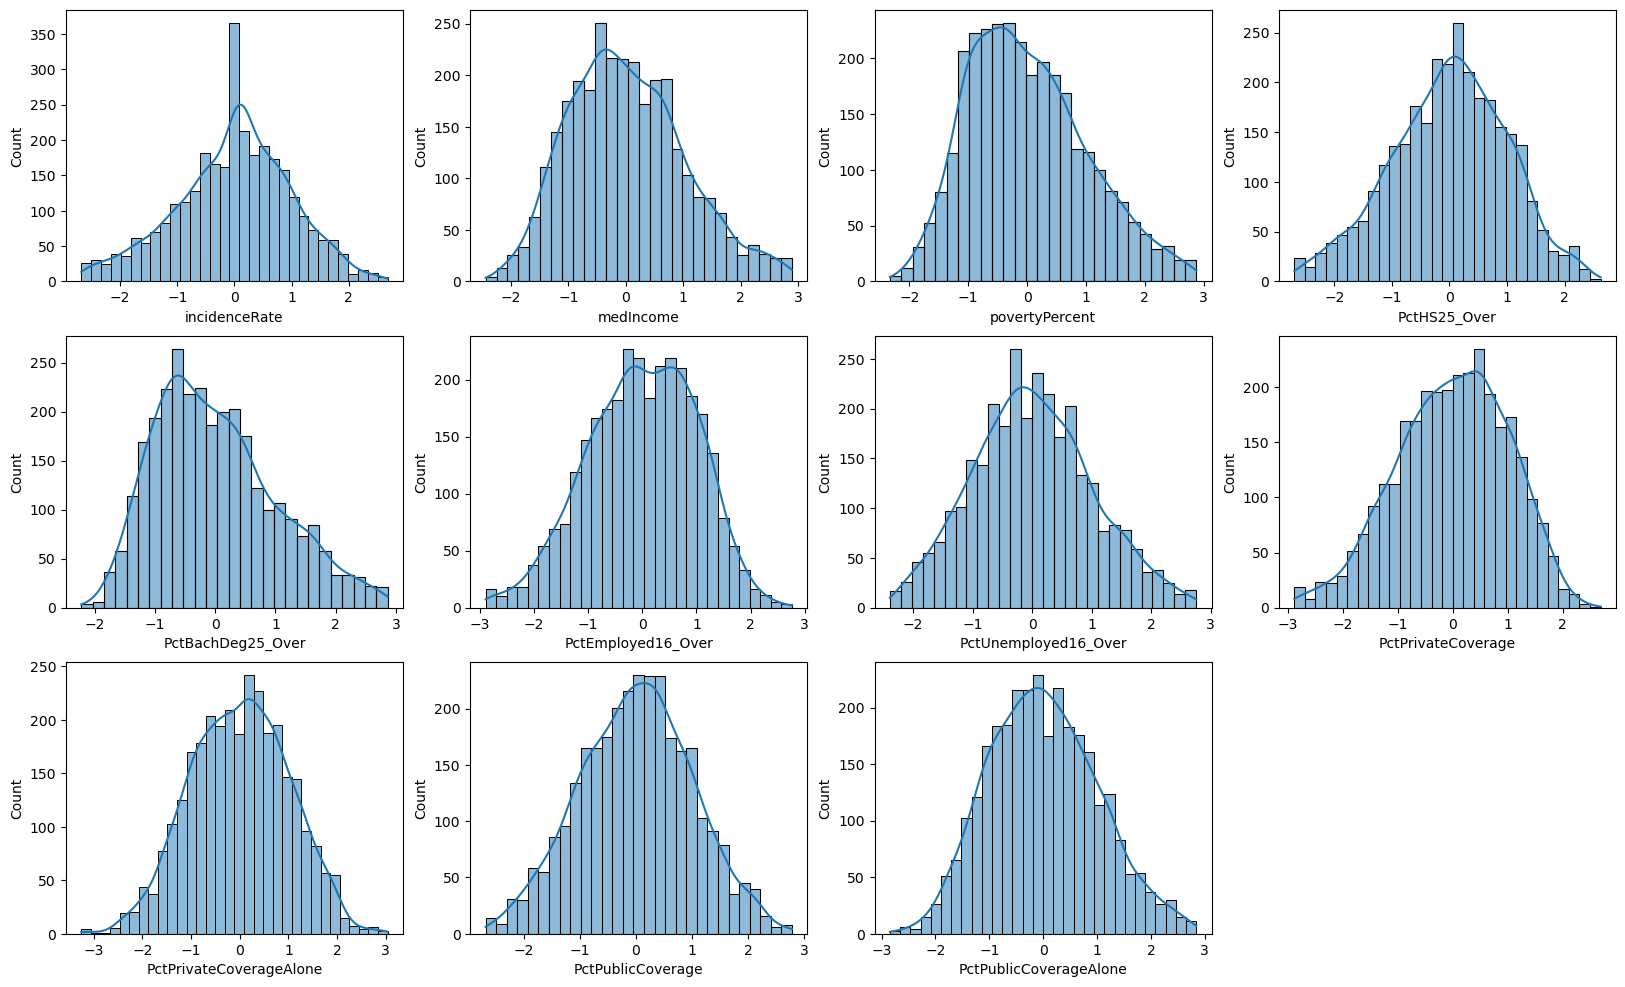

In [33]:
selected_DF = selected_DF.ffill()
selected_DF["PctPrivateCoverageAlone"] = selected_DF["PctPrivateCoverageAlone"].fillna(1)
fig, ax = plt.subplots(3, 4)
fig.set_figwidth(20)
fig.set_figheight(12)
z = 0   
for i in range(3):
    for j in range(4):
        if z == 11:
            break
        column = selected1[z]
        sns.histplot(data=selected_DF[column], kde=True, ax=ax[i, j])
        z += 1
fig.delaxes(ax[2][3])
plt.show()

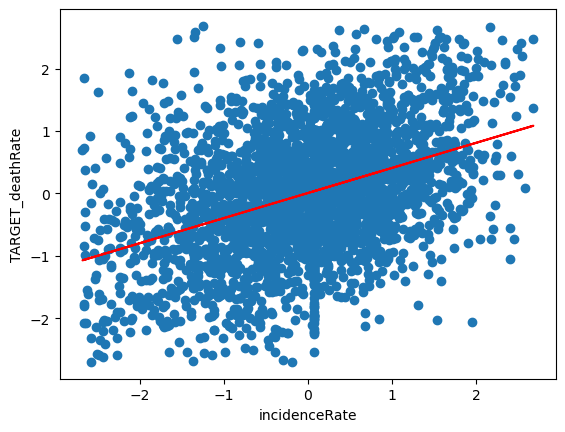

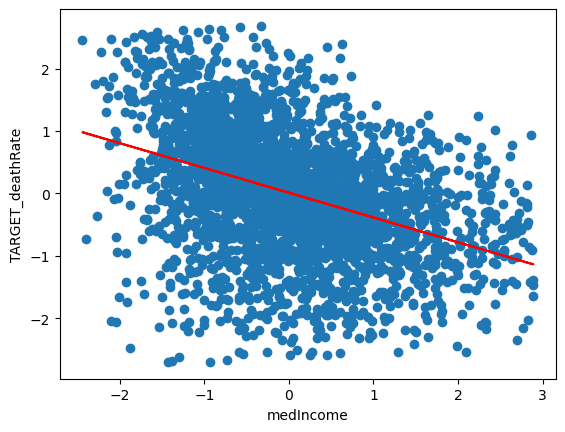

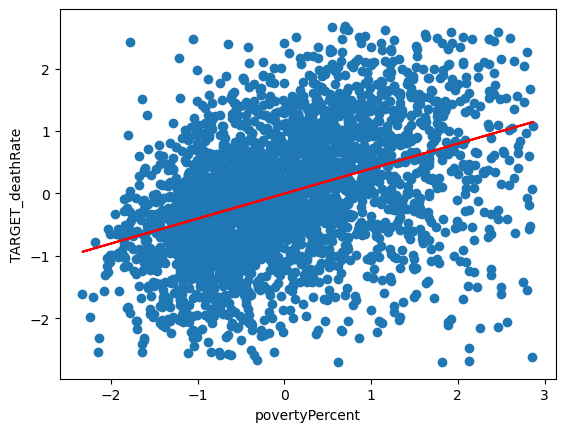

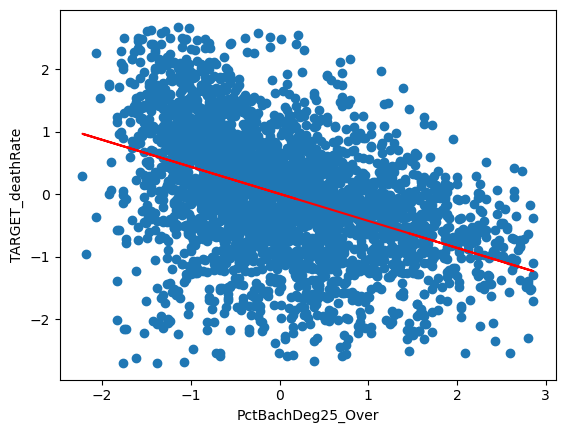

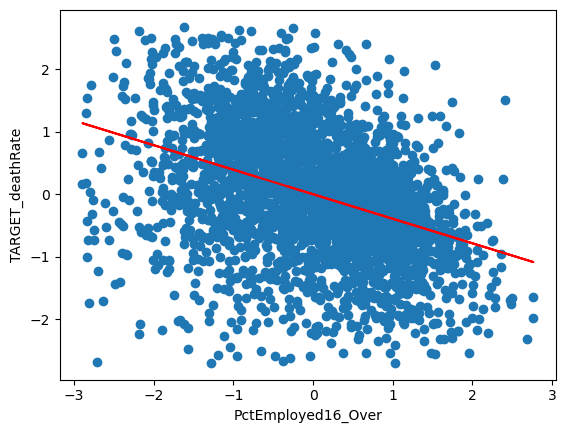

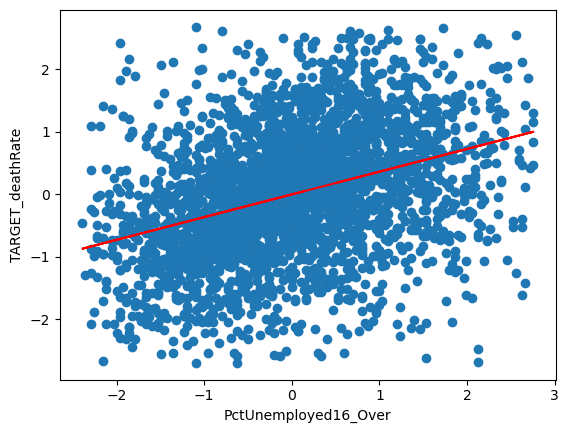

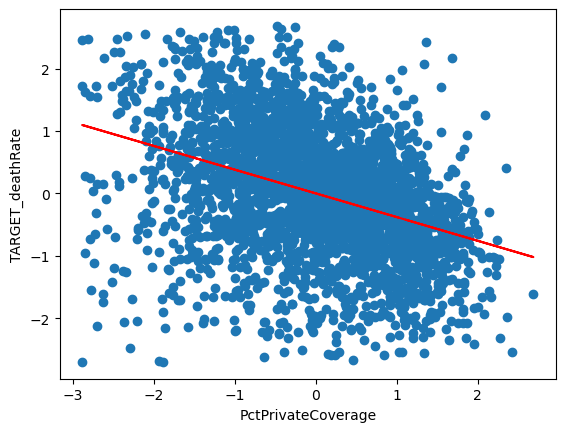

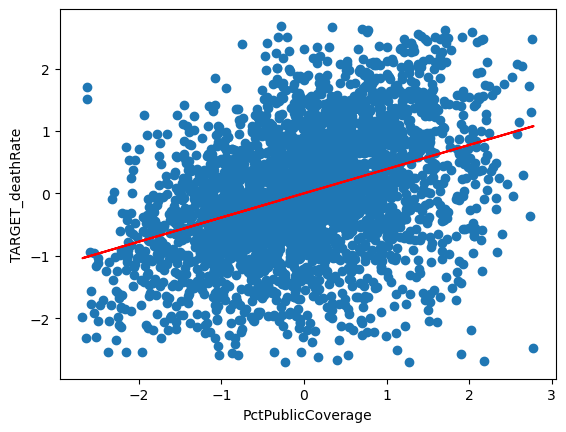

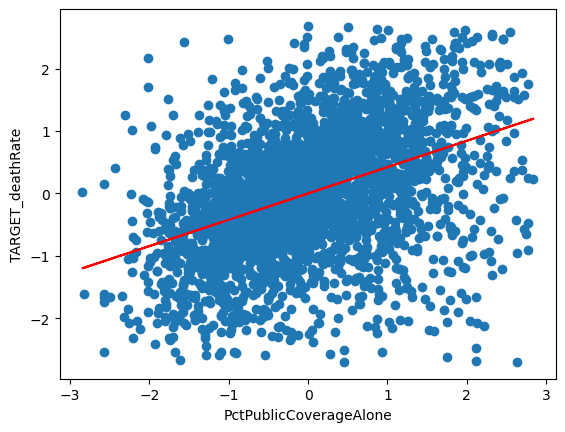

In [34]:
Target = selected_DF['TARGET_deathRate'].ffill()
length = Target.count()
Target_mean = Target.sum() / length
RCs = {}
for feature in selected:
    if feature == "TARGET_deathRate":
        continue
    # Converting two columns to numpy array
    x = selected_DF[feature].ffill()
    # calculate the correlation coefficient
    # calculate x-hat & y-hat
    x_mean = x.sum() / x.count()
    
    # calculate the correlation coefficient
    S_xy = ((x - x_mean)*(Target - Target_mean)).sum() / (length - 1)
    S_x_sq = ((x - x_mean) ** 2).sum() / (length - 1)
    b1 = S_xy / S_x_sq
    bo = Target_mean - b1 * x_mean
    RCs[feature] = [bo, b1]
    y_pred = [bo + b1 * xi for xi in x]
    # create a scatter plot of the data points
    plt.scatter(x, selected_DF['TARGET_deathRate'])

    # plot the regression line
    plt.plot(x, y_pred, color='red')

    # add labels and title to the plot
    plt.xlabel(feature)
    plt.ylabel('TARGET_deathRate')

    # display the plot
    plt.show()

In [40]:
reg = LinearRegression()
for feature in selected:
    if feature == "TARGET_deathRate":
        continue
    print(f"RC for {feature} is : bo = {RCs[feature][0]}, b1 = {RCs[feature][1]}")
    slope, intercept, r_value, p_value, std_err = stats.linregress(selected_DF[feature], selected_DF["TARGET_deathRate"])
    print(f"using standard python libraries: bo = {intercept}, b1 = {slope}")
    if feature == "PctPublicCoverageAlone":
        break
    print("-" * 100)

RC for incidenceRate is : bo = 0.007010370150941166, b1 = 0.4020450378823925
using standard python libraries: bo = 0.007010370150941163, b1 = 0.40204503788239226
----------------------------------------------------------------------------------------------------
RC for medIncome is : bo = 0.011530858183162542, b1 = -0.3970150205858868
using standard python libraries: bo = 0.011530858183162539, b1 = -0.3970150205858866
----------------------------------------------------------------------------------------------------
RC for povertyPercent is : bo = -0.002779418319073282, b1 = 0.40009280798515856
using standard python libraries: bo = -0.0027794183190732813, b1 = 0.40009280798515845
----------------------------------------------------------------------------------------------------
RC for PctHS25_Over is : bo = 0.0037440196474077822, b1 = 0.3911769638678029
using standard python libraries: bo = 0.003744019647407782, b1 = 0.39117696386780276
-----------------------------------------------

In [36]:
model = LinearRegression()
model.fit(selected_DF[selected1], selected_DF['TARGET_deathRate'])
res = DF[selected1].mean()
coefficients = model.coef_
intercept = model.intercept_
eq = ""
for i, coefficient in enumerate(coefficients):
    print(f"regression coefficient of predictor {selected1[i]} = {coefficient:4f} ")
    eq += str(round(coefficient, 4)) + " * x" + str(i + 1) + " + "
    res[selected1[i]] = "x" + str(i + 1)

eq +=  str(round(intercept, 4))
print(res)
print(f"model = {eq}")

regression coefficient of predictor incidenceRate = 0.371727 
regression coefficient of predictor medIncome = -0.078850 
regression coefficient of predictor povertyPercent = 0.092979 
regression coefficient of predictor PctHS25_Over = 0.229112 
regression coefficient of predictor PctBachDeg25_Over = -0.074358 
regression coefficient of predictor PctEmployed16_Over = -0.044266 
regression coefficient of predictor PctUnemployed16_Over = 0.103616 
regression coefficient of predictor PctPrivateCoverage = -0.131192 
regression coefficient of predictor PctPrivateCoverageAlone = 0.021936 
regression coefficient of predictor PctPublicCoverage = -0.099061 
regression coefficient of predictor PctPublicCoverageAlone = 0.065024 
incidenceRate               x1
medIncome                   x2
povertyPercent              x3
PctHS25_Over                x4
PctBachDeg25_Over           x5
PctEmployed16_Over          x6
PctUnemployed16_Over        x7
PctPrivateCoverage          x8
PctPrivateCoverageAlone  

In [54]:
print("the null hypothesis is the distribution is normal")
print("the alternative hypothesis is the distribution is not normal\n")
for feature in selected:
# Assuming your data is stored in a variable called 'data'
# Perform normality test using Shapiro-Wilk test
    statistic, p_value = stats.shapiro(selected_DF[feature])

# Check the p-value to determine if the distribution is normal or not
    alpha = [0.05, .1, .15]  # Significance level
    for value in alpha:
        if p_value > value:
            print(f"The distribution of {feature} is likely normal with significance level of {value}, Fail to reject the null hypothesis")
        else:
            print(f"The distribution of {feature} is not likely normal with significance level of {value}, reject the null hypothesis")
            
    if feature == "PctPublicCoverageAlone":
        break
    print("-" * 100)

the null hypothesis is the distribution is normal
the alternative hypothesis is the distribution is not normal

The distribution of TARGET_deathRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.025, reject the null hypothesis
----------------------------------------------------------------------------------------------------
The distribution of incidenceRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.025, reject the null hypothesis
----------------------------------------------------------------------------------------

In [51]:
print("the null hypothesis is the distribution is normal")
print("the alternative hypothesis is the distribution is not normal\n")
for feature in selected:
    # Assuming your data is stored in a variable called 'data'
    # Perform Box-Cox transformation
    transformed_data, lambda_value = stats.yeojohnson(selected_DF[feature])

    # Perform normality test on the transformed data
    statistic, p_value = stats.shapiro(transformed_data)
# Check the p-value to determine if the distribution is normal or not
    alpha = [0.05, .1, .15]  # Significance level
    for value in alpha:
        if p_value > value:
            print(f"The distribution of {feature} is likely normal with significance level of {value}, Fail to reject the null hypothesis")
        else:
            print(f"The distribution of {feature} is not likely normal with significance level of {value}, reject the null hypothesis")
            
    if feature == "PctPublicCoverageAlone":
        break
    print("-" * 100)

the null hypothesis is the distribution is normal
the alternative hypothesis is the distribution is not normal

The distribution of TARGET_deathRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.025, reject the null hypothesis
----------------------------------------------------------------------------------------------------
The distribution of incidenceRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.025, reject the null hypothesis
----------------------------------------------------------------------------------------

In [49]:
print("the null hypothesis is the distribution is normal")
print("the alternative hypothesis is the distribution is not normal\n")
for feature in selected:
    # Assuming your data is stored in a variable called 'data'
    # Perform Box-Cox transformation
    if selected_DF[feature].min() < 0:
        transformed_data, lambda_value = stats.boxcox((selected_DF[feature] - selected_DF[feature].min() + .0005))
    else:
        transformed_data, lambda_value = stats.boxcox(selected_DF[feature])

    # Perform normality test on the transformed data
    statistic, p_value = stats.shapiro(transformed_data)
# Check the p-value to determine if the distribution is normal or not
    alpha = [0.05, .1, .15]  # Significance level
    for value in alpha:
        if p_value > value:
            print(f"The distribution of {feature} is likely normal with significance level of {value}, Fail to reject the null hypothesis")
        else:
            print(f"The distribution of {feature} is not likely normal with significance level of {value}, reject the null hypothesis")
            
    if feature == "PctPublicCoverageAlone":
        break
    print("-" * 100)

the null hypothesis is the distribution is normal
the alternative hypothesis is the distribution is not normal

The distribution of TARGET_deathRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.25, reject the null hypothesis
----------------------------------------------------------------------------------------------------
The distribution of incidenceRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.25, reject the null hypothesis
------------------------------------------------------------------------------------------